# Which one is a better plan?

The telecom operator Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

This is going to be a preliminary analysis of the plans based on a relatively small client selection. We have the data on 500 Megaline clients: 
* who the clients are, 
* where they're from, 
* which plan they use, 
* and the number of calls they made and text messages they sent in 2018. 

The analysis's main goal is to determine which prepaid plan brings in more revenue.

**Plans decription:**<br>
**Surf**<br>
Monthly charge: 20USD<br>
500 monthly minutes, 50 texts, and 15 GB of data<br>
After exceeding the package limits:<br>
1 minute: 3 cents<br>
1 text message: 3 cents<br>
1 GB of data: 10USD<br>

**Ultimate**<br>
Monthly charge: 70USD<br>
3000 monthly minutes, 1000 text messages, and 30 GB of data<br>
After exceeding the package limits:<br>
1 minute: 1 cent<br>
1 text message: 1 cents<br>
1 GB of data: 7USD<br>

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import datetime as dt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import seaborn as sns
import matplotlib.pyplot as plt
import math


## Load data

In [2]:
# Load the data files into different DataFrames
try:
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

The data is split into several tables. I'll explore each one to get an initial understanding of the data. Let's see if there are any problems that need correction.

In [3]:
data = [calls, internet, messages, plans, users]
for i in data:
    i.info()
    i.describe()
    try:
        i.sample(10)
    except:
        i.head()
    i.duplicated().sum()
    print('------------------------------------------------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


,id,user_id,call_date,duration
108207,1382_1393,1382,2018-07-27,4.61
91367,1329_206,1329,2018-10-28,7.59
56710,1203_101,1203,2018-12-12,8.69
40051,1147_888,1147,2018-10-23,0.31
24804,1095_123,1095,2018-10-09,0.00
20071,1077_38,1077,2018-05-14,13.97
108383,1382_1702,1382,2018-10-04,3.25
128183,1460_228,1460,2018-12-05,3.18
25492,1098_168,1098,2018-10-08,21.54
48692,1175_173,1175,2018-11-16,3.33


0

------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


,id,user_id,session_date,mb_used
74275,1348_204,1348,2018-12-20,402.73
42455,1188_100,1188,2018-11-18,723.90
29652,1136_206,1136,2018-11-11,297.51
101253,1483_32,1483,2018-10-16,402.96
100906,1478_57,1478,2018-10-01,0.00
31393,1144_103,1144,2018-04-30,674.31
46122,1204_55,1204,2018-12-31,445.88
28441,1131_24,1131,2018-11-26,438.37
9825,1050_245,1050,2018-05-07,0.00
13573,1064_21,1064,2018-09-26,197.59


0

------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


,id,user_id,message_date
32430,1203_75,1203,2018-11-28
71026,1462_134,1462,2018-11-30
67701,1439_95,1439,2018-06-23
13384,1088_398,1088,2018-10-23
14188,1098_196,1098,2018-09-13
10606,1076_1372,1076,2018-09-20
36291,1241_95,1241,2018-10-21
20327,1130_2,1130,2018-09-21
36576,1244_8,1244,2018-12-28
49219,1328_177,1328,2018-10-09


0

------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


0

------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
139,1139,Thomas,Lawson,66,"New Orleans-Metairie, LA MSA",2018-11-18,surf,NaN
182,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,NaN
319,1319,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaN
338,1338,Janise,Bowman,21,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-09,surf,NaN
357,1357,Ria,Beach,61,"Baton Rouge, LA MSA",2018-05-30,surf,NaN
474,1474,Randee,Carpenter,26,"Bakersfield, CA MSA",2018-08-26,surf,NaN
341,1341,Kaila,Andrews,28,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-17,surf,NaN
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,NaN
241,1241,Lala,Walls,24,"Richmond, VA MSA",2018-08-27,surf,NaN
452,1452,Miguel,Sparks,32,"Tucson, AZ MSA",2018-12-29,surf,NaN


0

------------------------------------------------------------------------------------------------


## What can we see in the data?

### `calls`
1. The `call_date` has inappropriate format - object. To be able to add the necessary information about call's month at a later stage, we must convert the call_date to a datetime format.
2. There are some zeros in call duration - we need to investigate how many there are and check with plan conditions - will they be considered as a legit calls and rounded up to 1 or not.



### `internet`
1. The `session_date` has inappropriate format - object - and we need to change it to datetime in order to later add necessery information about session's month.
2. There are also some zeros in `mb_used` - we need to investigate how many there are and check with plan conditions - will they be considered as a legit internet session and rounded up in the end of the month.


### `messages`
1. The column `message_date` has inappropriate format - object - and we need to change it to datetime in order to later add necessery information about message's month.


### `users`
1. The column `reg_date` and `churn_date` has inappropriate format - object - and we need to change it to datetime.
2. The column `churn_date` representing the date the user stopped using the service a lot of missing values. Those missing values mean that the users are slill using megaline's service.



Let's take a look at the dataframes separetly in order to adress problems that we saw in the previous step.

## Plans

In [4]:
# Print the general/summary information about the plans' DataFrame
plans.info()
plans.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [5]:
# Print a sample of data for plans
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


If we will look closely at the plans we will see that it lacks column about monthly traffic allowance measured in gigabytes, now it measured in megabytes. To simplify further calculations, let's create a new column.

## Enrich data

In [6]:
plans['gb_per_month_included'] = (plans['mb_per_month_included']/ 1024).astype(int)
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()
users.describe(include='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Leonila,David,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-08,surf,2018-12-18
freq,3,3,80,5,339,3


In [8]:
# Print a sample of data for users
users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
142,1142,Charlesetta,Dillard,18,"New Orleans-Metairie, LA MSA",2018-08-23,surf,NaN
253,1253,Sumiko,Dudley,28,"Cleveland-Elyria, OH MSA",2018-08-18,ultimate,NaN
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
20,1020,Rutha,Bell,56,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-08,surf,NaN
435,1435,Darnell,Powell,23,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-07-24,ultimate,NaN
367,1367,Minh,Fischer,18,"Baltimore-Columbia-Towson, MD MSA",2018-07-23,surf,NaN
168,1168,Shay,Weaver,58,"Milwaukee-Waukesha, WI MSA",2018-12-13,surf,NaN
313,1313,Antoine,Baker,49,"San Francisco-Oakland-Berkeley, CA MSA",2018-05-24,surf,NaN
389,1389,Earleen,Glass,18,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-05-06,ultimate,NaN
419,1419,Bryon,Gordon,45,"Phoenix-Mesa-Chandler, AZ MSA",2018-03-29,surf,NaN


As previously mentioned, the reg_date and churn_date columns are currently in the inappropriate format and should be converted to the datetime format. 

The churn_date column, which represents the date that the user stopped using the service, has many missing values indicating that those users are still using Megaline's service. We don't need this column for the further analysis, so we going to leave it as it is in order to avoid confusion if (for example) the data from 2019 year will be added.

### Fix Data

Let's fix inappropriate formats and fill missing values.

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [10]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


### Enrich Data

In [11]:
# Print the general/summary information about the calls' DataFrame
calls.info()
calls.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [12]:
# Print a sample of data for calls
calls.sample(10)


,id,user_id,call_date,duration
136791,1495_244,1495,2018-10-26,8.94
53585,1192_725,1192,2018-10-12,3.07
135653,1491_620,1491,2018-05-14,17.26
122805,1434_98,1434,2018-08-04,0.00
52061,1187_254,1187,2018-04-20,7.25
134766,1489_94,1489,2018-12-07,9.10
74526,1263_510,1263,2018-03-27,0.00
97222,1347_48,1347,2018-11-15,1.21
35218,1132_631,1132,2018-09-25,10.96
78013,1279_141,1279,2018-12-14,1.26


The call_date has inappropriate format - object - and we need to change it to datetime in order to later add necessery information about call's month.

There are also some zeros in call duration - we need to investigate how many there are and check with plan conditions - will they be considered as a legit calls and rounded up to 1 or not.

Let's see how many of zeros in duration.

In [13]:
len(calls.query('duration == 0'))
round(len(calls.query('duration == 0'))/len(calls)*100, 2)

26834

19.48

 Almost 19,5% of all call's durations are 0. That is quite a lot. 
 
 Let's see if there is any correlation between those zeros and informaton in other columns

In [14]:
for i in calls:
    print(calls.query('duration == 0')[i].value_counts())
    print('------------------NEXT-COLUMN-----------------------')

1001_4      1
1331_113    1
1330_277    1
1330_276    1
1330_270    1
           ..
1167_316    1
1167_309    1
1167_307    1
1167_294    1
1499_194    1
Name: id, Length: 26834, dtype: int64
------------------NEXT-COLUMN-----------------------
1077    249
1324    236
1240    228
1334    224
1362    224
       ... 
1339      2
1306      1
1323      1
1481      1
1104      1
Name: user_id, Length: 478, dtype: int64
------------------NEXT-COLUMN-----------------------
2018-12-24    223
2018-12-29    223
2018-12-28    218
2018-12-22    215
2018-12-19    214
             ... 
2018-01-18      1
2018-02-20      1
2018-01-21      1
2018-01-19      1
2018-01-20      1
Name: call_date, Length: 348, dtype: int64
------------------NEXT-COLUMN-----------------------
0.0    26834
Name: duration, dtype: int64
------------------NEXT-COLUMN-----------------------


Since I am unable to identify any patterns, I am assuming that the occurrence of zeros is due to technical or other reasons. 

The plan's terms require that calls lasting at least 0.1 minutes will be rounded up to 1 minute. But if a call did not connect, the client will not be charged for it. 

Consequently, this will not have any impact on Megaline's revenue. 

### Fix data

Let's change data type in `call_date` to datetime.

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


As we know by the plan's conditions each call will be rounded up, so we need to do the same in order to proceed with accuracy.

In [16]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

### Enrich data

To be able to calculate the total amount and duration of calls made by clients each month, we need to add a new column representing the month in which calls were made.

In [17]:
calls['month'] = calls['call_date'].dt.month
calls.info()
calls.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB


,id,user_id,call_date,duration,month
72480,1257_220,1257,2018-12-14,3,12
68775,1247_108,1247,2018-10-15,2,10
52746,1189_154,1189,2018-11-15,0,11
119833,1417_522,1417,2018-09-12,7,9
3268,1011_121,1011,2018-07-23,0,7
93733,1334_1101,1334,2018-04-14,15,4
48120,1174_97,1174,2018-10-22,2,10
5086,1022_352,1022,2018-09-24,11,9
130687,1470_136,1470,2018-12-18,5,12
1074,1007_95,1007,2018-11-16,0,11


## Messages

In [18]:
# Print the general/summary information about the messages' DataFrame
messages.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Print a sample of data for messages
messages.sample(10)


,id,user_id,message_date
19237,1124_124,1124,2018-11-21
61321,1384_426,1384,2018-07-03
16620,1111_115,1111,2018-12-24
41799,1268_172,1268,2018-06-24
63900,1408_25,1408,2018-10-29
75074,1489_149,1489,2018-12-18
47175,1320_419,1320,2018-05-14
58369,1370_37,1370,2018-09-30
25095,1148_109,1148,2018-11-20
30412,1192_45,1192,2018-11-27


Once again, we must convert the message_date into a suitable datetime format and then subtract a month from it.

### Fix data

In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enrich data

In [21]:
messages['month'] = messages['message_date'].dt.month
messages.info()
messages.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


,id,user_id,message_date,month
55745,1352_24,1352,2018-09-25,9
11908,1079_307,1079,2018-09-19,9
16973,1113_19,1113,2018-08-22,8
27069,1167_26,1167,2018-06-03,6
36117,1237_138,1237,2018-12-10,12
67939,1439_333,1439,2018-09-20,9
22614,1133_913,1133,2018-12-29,12
44889,1301_152,1301,2018-11-21,11
3899,1038_252,1038,2018-11-11,11
41562,1267_73,1267,2018-12-20,12


## Internet

In [22]:
# Print the general/summary information about the internet DataFrame
internet.info()
internet.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [23]:
# Print a sample of data for the internet traffic
internet.sample(10)


,id,user_id,session_date,mb_used
33112,1149_103,1149,2018-11-26,461.39
44436,1196_448,1196,2018-09-12,790.71
60579,1276_63,1276,2018-12-22,404.46
20221,1092_61,1092,2018-12-21,759.44
37986,1171_357,1171,2018-09-14,324.22
80674,1377_99,1377,2018-09-18,555.33
46967,1209_229,1209,2018-12-04,529.47
100746,1477_61,1477,2018-12-25,669.74
99944,1472_448,1472,2018-09-03,336.28
36527,1164_210,1164,2018-10-20,535.42


There are some zeros in the column `mb_used`. Let's check how many of them we have.

In [24]:
len(internet.query('mb_used == 0'))
round(len(internet.query('mb_used == 0'))/len(internet)*100, 2)

13747

13.11

There are 13% of the data on Internet traffic consumption. Let's see if there's any correlation between these zeros and other columns. 

In [25]:
for i in internet:
    print((internet.query('mb_used == 0'))[i].value_counts())
    print('------------------NEXT-COLUMN-----------------------')

1000_204    1
1322_166    1
1322_183    1
1322_189    1
1322_195    1
           ..
1157_119    1
1157_122    1
1157_123    1
1157_129    1
1499_218    1
Name: id, Length: 13747, dtype: int64
------------------NEXT-COLUMN-----------------------
1041    118
1261    110
1185    110
1171    109
1138    106
       ... 
1298      1
1471      1
1015      1
1250      1
1000      1
Name: user_id, Length: 477, dtype: int64
------------------NEXT-COLUMN-----------------------
2018-12-27    120
2018-12-11    117
2018-12-25    116
2018-12-07    115
2018-12-28    113
             ... 
2018-01-17      1
2018-01-23      1
2018-01-28      1
2018-03-16      1
2018-02-07      1
Name: session_date, Length: 339, dtype: int64
------------------NEXT-COLUMN-----------------------
0.0    13747
Name: mb_used, dtype: int64
------------------NEXT-COLUMN-----------------------


It appears that the zeros in the dataset cannot be linked to any information provided in the other columns. As a result, it is assumed that these zeros correspond to sessions that did not occur. Similar to how unconnected calls are handled, these non-occurring sessions will not have an impact on the revenue of the company.

### Fix data

But there is problem that need to be adressed - wrong format for the `session_date`. Let's fix it.

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enrich data

We also need to add month column to the table and convert used traffic to gigabytes.

In [27]:
internet['month'] = internet['session_date'].dt.month
mb_to_gb = 0.001
internet['gb_used'] = internet['mb_used']*mb_to_gb
internet.info()
internet.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.8+ MB


,id,user_id,session_date,mb_used,month,gb_used
28596,1131_179,1131,2018-09-04,531.07,9,0.53107
28616,1131_199,1131,2018-07-14,1227.98,7,1.22798
19470,1088_217,1088,2018-07-22,89.15,7,0.08915
326,1002_336,1002,2018-12-14,759.11,12,0.75911
18109,1081_174,1081,2018-11-26,143.96,11,0.14396
97894,1461_8,1461,2018-10-16,356.81,10,0.35681
62759,1289_75,1289,2018-12-12,0.00,12,0.00000
37854,1171_225,1171,2018-12-02,452.87,12,0.45287
83260,1389_147,1389,2018-09-05,0.00,9,0.00000
71741,1334_309,1334,2018-10-03,503.91,10,0.50391


## Study plan conditions

It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we  print out the plan information to view their conditions once again.

In [28]:
# Print out the plan conditions and make sure they are clear for you
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Aggregate data per user

Now, as the data is clean, we aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.

In [29]:
# Calculate the number of calls made by each user per month. Save the result.
calls_group_count = calls.groupby(['user_id','month'])['duration'].count().reset_index()
calls_group_count.rename(columns={"duration": "calls_n"}, inplace=True)
calls_group_count

,user_id,month,calls_n
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [30]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_group_sum = calls.groupby(['user_id','month'])['duration'].sum().reset_index()
calls_group_sum.rename(columns={"duration": "calls_dur"}, inplace=True)
calls_group_sum

,user_id,month,calls_dur
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [31]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_group = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_group.rename(columns={"id": "messages_n"}, inplace=True)
messages_group

,user_id,month,messages_n
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


Let's group data for the web traffic. And as we know by the plan's conditions total amount of used traffic will be rounded up in the end of the month, so we need to do the same in order to proceed with accuracy.

In [32]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_group = internet.groupby(['user_id','month'])['gb_used'].sum().reset_index()
internet_group['gb_used'] = internet_group['gb_used'].apply(np.ceil).astype(int)
internet_group

,user_id,month,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,23
4,1001,11,19
...,...,...,...
2272,1498,12,24
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


Let's put the aggregated data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [33]:
from functools import reduce

In [34]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
data_frames = [calls_group_count, calls_group_sum, messages_group, internet_group]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)

df_merged.fillna(0)



,user_id,month,calls_n,calls_dur,messages_n,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,23.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,14.0
2289,1361,5,0.0,0.0,2.0,2.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,1.0


In [35]:
len(df_merged.user_id.unique())

490

We also need the information about user's plan. It'll be useful to have all data on users in one place, so we join the previously aggregated data with our user's dataframe.

In [36]:
# Add the plan information
total= pd.merge(left = df_merged, right = users, how='outer',on='user_id').fillna(0)
total

,user_id,month,calls_n,calls_dur,messages_n,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1001,9.0,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
3,1001,10.0,65.0,393.0,53.0,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
4,1001,11.0,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.0,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,0
2299,1319,0.0,0.0,0.0,0.0,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,0
2300,1378,0.0,0.0,0.0,0.0,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,0
2301,1463,0.0,0.0,0.0,0.0,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,0


Now we need to calculate the monthly revenue from each user.

In [37]:
# Calculate the monthly revenue for each user
def cost(row):
    plan = row['plan']
    minutes = row['calls_dur']
    messages = row['messages_n']
    traffic = row['gb_used']
    
    if plan == 'surf':
        plan_cost=20
        if plan == 'surf' and minutes>500:
            minutes_cost=(minutes - 500)*0.03
        else:
            minutes_cost=0  
        if plan == 'surf' and messages>50:
            messages_cost=(messages - 50)*0.03
        else:
            messages_cost=0
        if plan == 'surf' and traffic>15:
            traffic_cost=(traffic - 15)*10
        else:
            traffic_cost=0
    else:
        plan_cost=70
        if plan == 'ultimate' and minutes>3000:
            minutes_cost=(minutes - 3000)*0.01
        else:
            minutes_cost=0    
        if plan == 'ultimate' and messages>1000:
            messages_cost=(messages - 1000)*0.01
        else:
            messages_cost=0   
        if plan == 'ultimate' and traffic>30:
            traffic_cost=(traffic - 30)*7
        else:
            traffic_cost=0
   
    total_revenue=plan_cost+minutes_cost+messages_cost+traffic_cost
    return total_revenue


In [38]:
total['total_revenue'] = total.apply(cost,axis=1)
total

,user_id,month,calls_n,calls_dur,messages_n,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_revenue
0,1000,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,70.00
1,1001,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
2,1001,9.0,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
3,1001,10.0,65.0,393.0,53.0,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,100.09
4,1001,11.0,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.0,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,0,20.00
2299,1319,0.0,0.0,0.0,0.0,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,0,20.00
2300,1378,0.0,0.0,0.0,0.0,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,0,20.00
2301,1463,0.0,0.0,0.0,0.0,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,0,70.00


Let's substract prepaid package in order to understad wich plan's users are paing more to the company.

In [39]:
def additional_revenue(row):
    plan = row['plan']
    total = row['total_revenue']
    
    if plan == 'surf':
        return total-20
    else:
        return total-70

In [40]:
total['add_revenue']=total.apply(additional_revenue,axis=1)
total

,user_id,month,calls_n,calls_dur,messages_n,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_revenue,add_revenue
0,1000,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,70.00,0.00
1,1001,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00,0.00
2,1001,9.0,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00,0.00
3,1001,10.0,65.0,393.0,53.0,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,100.09,80.09
4,1001,11.0,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,60.00,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.0,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,0,20.00,0.00
2299,1319,0.0,0.0,0.0,0.0,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,0,20.00,0.00
2300,1378,0.0,0.0,0.0,0.0,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,0,20.00,0.00
2301,1463,0.0,0.0,0.0,0.0,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,0,70.00,0.00


In [41]:
total.query('month == 0')
len(total.query('month == 0'))
round(len(total.query('month == 0'))/len(total)*100, 2)

,user_id,month,calls_n,calls_dur,messages_n,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_revenue,add_revenue
2293,1025,0.0,0.0,0.0,0.0,0.0,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,0,70.0,0.0
2294,1129,0.0,0.0,0.0,0.0,0.0,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27 00:00:00,20.0,0.0
2295,1143,0.0,0.0,0.0,0.0,0.0,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,0,20.0,0.0
2296,1269,0.0,0.0,0.0,0.0,0.0,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15 00:00:00,70.0,0.0
2297,1275,0.0,0.0,0.0,0.0,0.0,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,0,70.0,0.0
2298,1307,0.0,0.0,0.0,0.0,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,0,20.0,0.0
2299,1319,0.0,0.0,0.0,0.0,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,0,20.0,0.0
2300,1378,0.0,0.0,0.0,0.0,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,0,20.0,0.0
2301,1463,0.0,0.0,0.0,0.0,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,0,70.0,0.0
2302,1473,0.0,0.0,0.0,0.0,0.0,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,0,20.0,0.0


10

0.43

As we can see here appeared zeros in column `month` - as a result of filling missing values in time of the last merge. These people were only in the users dataframe, so they were subscribed to plans, but didn't use any of Megaline services (calls, messages, internet). We don't even know if they were srill charged for the subscription, and there are only 10 of them (less than half of the percent), and their impact on the company's revenue is almost imperceptible, so we just ignore them for now.

Let's make a dataframe for users and company's revenue. Mayby we will need it later.

In [42]:
users_grouped = total.groupby(['user_id', 'city', 'plan'])[['total_revenue', 'add_revenue']].sum().reset_index()
users_grouped
users_grouped.groupby('plan')['add_revenue'].sum()

,user_id,city,plan,total_revenue,add_revenue
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00,0.00
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,270.09,170.09
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf,110.00,50.00
3,1003,"Tulsa, OK MSA",surf,168.12,148.12
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf,630.00,470.00
...,...,...,...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,483.30,403.30
496,1496,"New Orleans-Metairie, LA MSA",surf,140.00,40.00
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,70.00,0.00
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,890.00,670.00


plan
surf        68601.18
ultimate     1946.00
Name: add_revenue, dtype: float64

## Study user behaviour

Let's calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data.

We start by creating dataframe for each plan separetly and look at what we get.

In [43]:
surf_users = total.query('plan == "surf"')
surf_users.describe()


,user_id,month,calls_n,calls_dur,messages_n,gb_used,age,total_revenue,add_revenue
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
mean,1242.940469,9.147562,59.584547,427.120329,31.041165,16.972768,44.382521,63.445966,43.445966
std,139.200115,2.527494,32.168377,235.490079,33.557683,8.069558,16.669207,57.360886,57.360886
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,20.000000,0.000000
25%,1120.000000,8.000000,39.000000,269.000000,3.000000,12.000000,29.000000,20.000000,0.000000
50%,1245.000000,10.000000,60.000000,424.000000,24.000000,17.000000,45.000000,43.750000,23.750000
75%,1358.000000,11.000000,79.000000,576.000000,47.000000,21.000000,60.000000,90.000000,70.000000
max,1499.000000,12.000000,205.000000,1510.000000,266.000000,71.000000,75.000000,600.370000,580.370000


In [44]:
ultimate_users = total.query('plan == "ultimate"')
ultimate_users.describe()

,user_id,month,calls_n,calls_dur,messages_n,gb_used,age,total_revenue,add_revenue
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,1253.356354,9.100829,60.291436,428.071823,37.343923,17.621547,47.685083,72.687845,2.687845
std,150.941802,2.640162,33.454527,241.958423,34.782576,7.952861,16.793440,12.639564,12.639564
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,70.000000,0.000000
25%,1126.000000,7.000000,36.000000,258.750000,6.000000,13.000000,34.000000,70.000000,0.000000
50%,1246.000000,10.000000,61.000000,421.500000,30.000000,17.000000,48.000000,70.000000,0.000000
75%,1401.000000,11.000000,79.250000,564.250000,60.250000,21.250000,64.000000,70.000000,0.000000
max,1497.000000,12.000000,191.000000,1369.000000,166.000000,47.000000,75.000000,189.000000,119.000000


Let's check the distribution of the core parameters in both our plans and plot graphs to visualize it.

In [45]:
def distribution(parameter):
    data = [surf_users, ultimate_users]
    for i in data:
        print('The histogram of: {}'.format(parameter),)
        i[parameter].hist(figsize=(4,3))
        plt.show()
        if i[parameter].mean()>i[parameter].median():
            print('The distribution is skewed to the right')
        else:
            print('The distribution is skewed to the left')
        print('---------------------------------------')
        print('Statistics on: {}'.format(parameter))
        print(i[parameter].describe())
        ninety_eight = np.percentile(i[parameter], 98)
        two = np.percentile(i[parameter], 2)
        print('---------------------------------------')
        print('min border:',two)
        print('max border:',ninety_eight)
        print('---------------------------------------')
        print('The outliers are considered to be values below',two, "and above",ninety_eight)
        print('We have',len(i[(i[parameter]<two)|(i[parameter]>ninety_eight)])
              ,"values that we can consider outliers")
        print('This is',round(len(i[(i[parameter]<two)|(i[parameter]>ninety_eight)])/len(i)*100, 2)
              ,"% of data")
        print('--------------------------------------------NEXT-----------------------------------------------------')


The histogram of: calls_dur


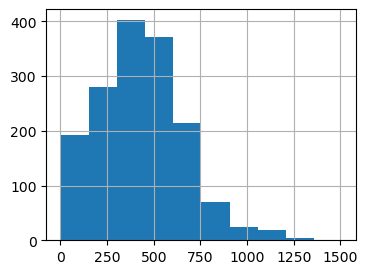

The distribution is skewed to the right
---------------------------------------
Statistics on: calls_dur
count    1579.000000
mean      427.120329
std       235.490079
min         0.000000
25%       269.000000
50%       424.000000
75%       576.000000
max      1510.000000
Name: calls_dur, dtype: float64
---------------------------------------
min border: 0.0
max border: 1015.2000000000003
---------------------------------------
The outliers are considered to be values below 0.0 and above 1015.2000000000003
We have 32 values that we can consider outliers
This is 2.03 % of data
--------------------------------------------NEXT-----------------------------------------------------
The histogram of: calls_dur


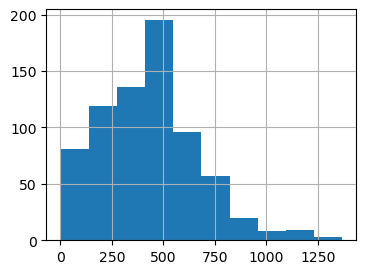

The distribution is skewed to the right
---------------------------------------
Statistics on: calls_dur
count     724.000000
mean      428.071823
std       241.958423
min         0.000000
25%       258.750000
50%       421.500000
75%       564.250000
max      1369.000000
Name: calls_dur, dtype: float64
---------------------------------------
min border: 13.840000000000003
max border: 1032.3999999999996
---------------------------------------
The outliers are considered to be values below 13.840000000000003 and above 1032.3999999999996
We have 30 values that we can consider outliers
This is 4.14 % of data
--------------------------------------------NEXT-----------------------------------------------------


In [46]:
distribution('calls_dur')

Upon examining the data, we observe that the mean call durations for both plans are almost identical, with 427 for Surf and 428 for Ultimate. However, there are slight differences in their distributions. The Surf plan exhibits higher percentiles values and maximum values, indicating that Surf users tend to talk on the phone a bit more than Ultimate users. 

The histogram of: messages_n


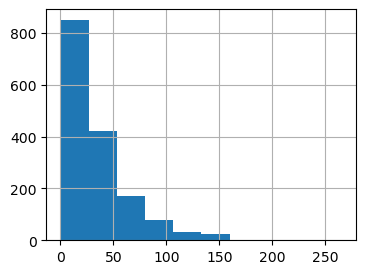

The distribution is skewed to the right
---------------------------------------
Statistics on: messages_n
count    1579.000000
mean       31.041165
std        33.557683
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages_n, dtype: float64
---------------------------------------
min border: 0.0
max border: 128.8800000000001
---------------------------------------
The outliers are considered to be values below 0.0 and above 128.8800000000001
We have 32 values that we can consider outliers
This is 2.03 % of data
--------------------------------------------NEXT-----------------------------------------------------
The histogram of: messages_n


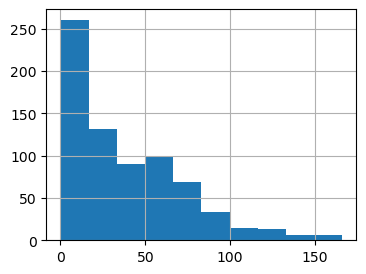

The distribution is skewed to the right
---------------------------------------
Statistics on: messages_n
count    724.000000
mean      37.343923
std       34.782576
min        0.000000
25%        6.000000
50%       30.000000
75%       60.250000
max      166.000000
Name: messages_n, dtype: float64
---------------------------------------
min border: 0.0
max border: 126.53999999999996
---------------------------------------
The outliers are considered to be values below 0.0 and above 126.53999999999996
We have 15 values that we can consider outliers
This is 2.07 % of data
--------------------------------------------NEXT-----------------------------------------------------


In [47]:
distribution('messages_n')

In [48]:
np.percentile(surf_users['messages_n'], 79)

51.0

The distributions of messages for both plans is comparable, but with a slight difference. This time ultimate users tend to send more messages than surf users, but they remain within the limits of their plan's included allowance. On the other hand, surf users tend to send fewer messages, but still around 20% of them exceed their plan's included amount of messages.

The histogram of: gb_used


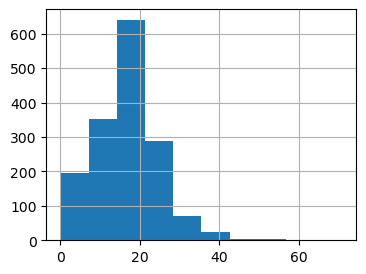

The distribution is skewed to the left
---------------------------------------
Statistics on: gb_used
count    1579.000000
mean       16.972768
std         8.069558
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        71.000000
Name: gb_used, dtype: float64
---------------------------------------
min border: 1.0
max border: 36.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 36.0
We have 48 values that we can consider outliers
This is 3.04 % of data
--------------------------------------------NEXT-----------------------------------------------------
The histogram of: gb_used


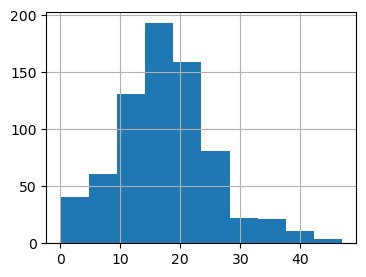

The distribution is skewed to the right
---------------------------------------
Statistics on: gb_used
count    724.000000
mean      17.621547
std        7.952861
min        0.000000
25%       13.000000
50%       17.000000
75%       21.250000
max       47.000000
Name: gb_used, dtype: float64
---------------------------------------
min border: 2.0
max border: 37.539999999999964
---------------------------------------
The outliers are considered to be values below 2.0 and above 37.539999999999964
We have 26 values that we can consider outliers
This is 3.59 % of data
--------------------------------------------NEXT-----------------------------------------------------


In [49]:
distribution('gb_used')

The distribution of consumed traffic for both plan users appears similar, although there is a slight difference in the shape of the distributions. The distribution for surf users is skewed to the left, while the distribution for ultimate users is skewed to the right. Despite this, the mean and median values for both plans are approximately the same at around 17.

For surf users, this means that more than 50% of the consumed traffic is beyond their plan limit of 15Gb, and they will need to pay an additional fee for the extra data usage.

The histogram of: total_revenue


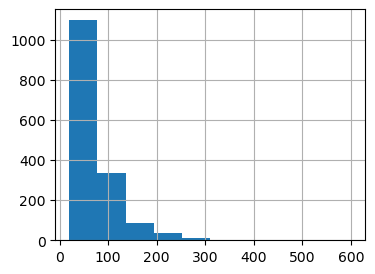

The distribution is skewed to the right
---------------------------------------
Statistics on: total_revenue
count    1579.000000
mean       63.445966
std        57.360886
min        20.000000
25%        20.000000
50%        43.750000
75%        90.000000
max       600.370000
Name: total_revenue, dtype: float64
---------------------------------------
min border: 20.0
max border: 232.19720000000004
---------------------------------------
The outliers are considered to be values below 20.0 and above 232.19720000000004
We have 32 values that we can consider outliers
This is 2.03 % of data
--------------------------------------------NEXT-----------------------------------------------------
The histogram of: total_revenue


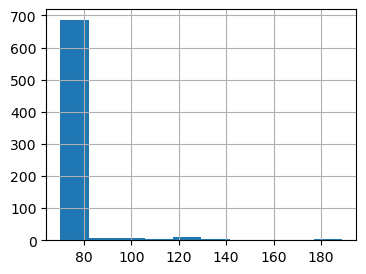

The distribution is skewed to the right
---------------------------------------
Statistics on: total_revenue
count    724.000000
mean      72.687845
std       12.639564
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      189.000000
Name: total_revenue, dtype: float64
---------------------------------------
min border: 70.0
max border: 122.77999999999975
---------------------------------------
The outliers are considered to be values below 70.0 and above 122.77999999999975
We have 15 values that we can consider outliers
This is 2.07 % of data
--------------------------------------------NEXT-----------------------------------------------------


In [50]:
distribution('total_revenue')

In [51]:
np.percentile(surf_users['total_revenue'], 27)
np.percentile(ultimate_users['total_revenue'],65)

20.063599999999997

70.0

What do we see in distribution of the total revenue? 

The average monthly revenue from Surf users is 63.4 dollars and a median value is 43.7.
The average monthly revenue from Ultimate users is 72.6 dollars and a median value is 70.

If we look at the distributions and numerical statistics of the total revenues from our users it becomes evident that around 73% (!) of Surf users montly payments are bigger than plan's initial cost - 20$.

And for the Ultimate plan it's 35 - 35% of montly payments are bigger than plan's initial cost, which is 70.

And now let's check how looks statistics and plots for additional revenue, how much extra money users pay monthly.

The histogram of: add_revenue


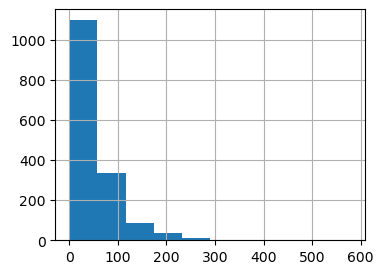

The distribution is skewed to the right
---------------------------------------
Statistics on: add_revenue
count    1579.000000
mean       43.445966
std        57.360886
min         0.000000
25%         0.000000
50%        23.750000
75%        70.000000
max       580.370000
Name: add_revenue, dtype: float64
---------------------------------------
min border: 0.0
max border: 212.19720000000004
---------------------------------------
The outliers are considered to be values below 0.0 and above 212.19720000000004
We have 32 values that we can consider outliers
This is 2.03 % of data
--------------------------------------------NEXT-----------------------------------------------------
The histogram of: add_revenue


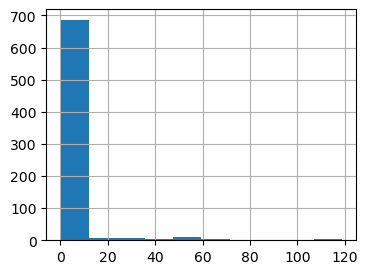

The distribution is skewed to the right
---------------------------------------
Statistics on: add_revenue
count    724.000000
mean       2.687845
std       12.639564
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      119.000000
Name: add_revenue, dtype: float64
---------------------------------------
min border: 0.0
max border: 52.779999999999745
---------------------------------------
The outliers are considered to be values below 0.0 and above 52.779999999999745
We have 15 values that we can consider outliers
This is 2.07 % of data
--------------------------------------------NEXT-----------------------------------------------------


In [52]:
distribution('add_revenue')

In [53]:
np.percentile(surf_users['add_revenue'], 27)
np.percentile(ultimate_users['add_revenue'],93.64)

0.06359999999999899

0.12040000000001783

The Surf users' monthly additional payments exhibit a substantial difference between their mean and median (43.4 and 23.7, respectively), indicating a highly right-skewed distribution, with the majority of payments situated on the right-hand side of the plot. Over 73% of users make extra payments.

Conversely, for Ultimate users, the situation is very different. While their additional payment histogram is also skewed to the right, the mean and median values differ only slightly (2.6 and 0, respectively). Furthermore, slightly over 6% of monthly payments are classified as extra.

### Calls

Now let's combine the graphs from two plans together so we can look how differently (or similarly) their users behave.

In [54]:
# Compare average duration of calls per each plan per each distinct month.
call_average_month = total.pivot_table(index='plan', columns='month', values='calls_dur', aggfunc='mean')
call_average_month

month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
plan,,,,,,,,,,,,,
surf,0.0,203.0,297.000000,330.00,351.540000,399.584416,431.298969,449.983471,410.111111,414.226804,429.729958,423.325088,473.836478
ultimate,0.0,193.5,403.142857,304.25,336.857143,406.241379,370.957447,427.067797,421.436620,437.511628,450.735849,445.196850,459.099338


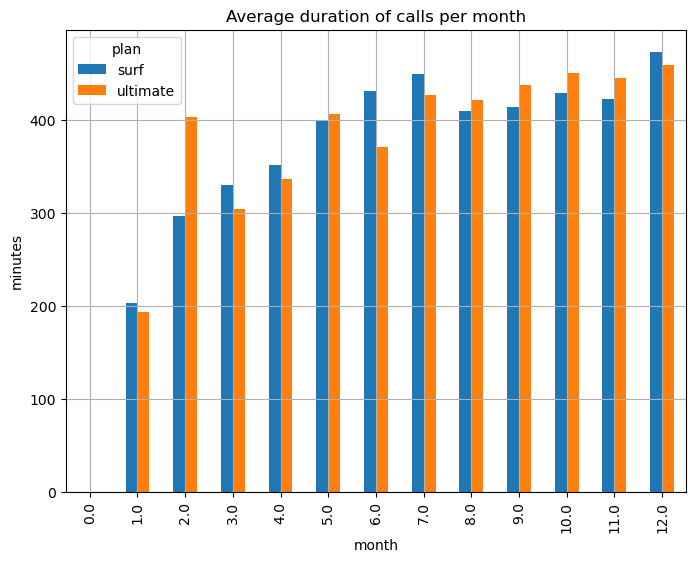

In [55]:
# Plot a bar plot to visualize it.
call_average_month.T.plot(figsize=(8,6), kind='bar', grid= True)
plt.title('Average duration of calls per month')
plt.ylabel('minutes');

Based on the given information, we can see that for most months, the average call durations do not differ significantly between Surf and Ultimate users, except for a few exceptions. In February, the average call duration for Ultimate users was notably longer than for Surf users. In contrast, in June, the average call duration for Surf users was longer than for Ultimate users. It is possible that Megaline introduced some advertising and marketing campaigns in February and June for diffetent plans leading to increased call durations.

To determine whether the distributions of call durations are similar between Surf and Ultimate users, we would need to analyze the data further. We could generate histograms of call durations for both groups to compare their distributions visually. 

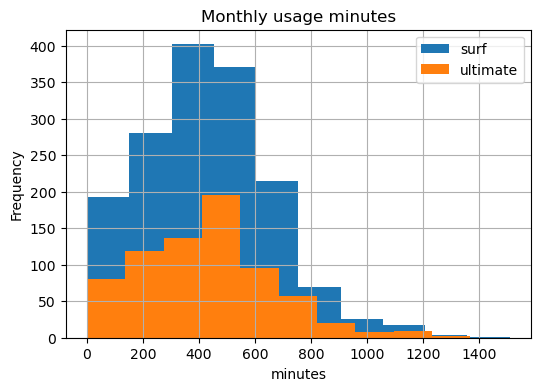

In [56]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
total.groupby('plan')['calls_dur'].plot(kind='hist', grid=True, figsize=(6,4))
plt.legend(('surf', 'ultimate'), loc='upper right')
plt.title('Monthly usage minutes')
plt.xlabel('minutes')
plt.show();

The distributions of call durations for Surf and Ultimate do look alike and have comparable means and medians (as we already mentioned in the previous steps when studied these parameters separately) so it is likely that the two groups do not significantly differ in their call usage habits. 

Let's calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.

In [57]:
# Calculate the mean and the variance of the monthly call duration
surf_user_call_duration = surf_users.calls_dur.mean()
print('Surf users averege call duration:', surf_user_call_duration)
surf_user_call_variance = np.var(surf_users.calls_dur)
print('Surf users call duration variance:', surf_user_call_variance)
ultimate_user_call_duration = ultimate_users.calls_dur.mean()
print('Ultimate users averege call duration:', ultimate_user_call_duration)
ultimate_user_call_variance = np.var(ultimate_users.calls_dur)
print('Ultimate users call duration variance:', ultimate_user_call_variance)


Surf users averege call duration: 427.12032932235593
Surf users call duration variance: 55420.45670514796
Ultimate users averege call duration: 428.0718232044199
Ultimate users call duration variance: 58463.01694087476


In [58]:
total.pivot_table(index= 'plan', values= 'calls_dur', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,calls_dur,calls_dur,calls_dur,calls_dur
plan,,,,
surf,427.120329,55455.577400,235.490079,424.0
ultimate,428.071823,58543.878652,241.958423,421.5


And now we plot a boxplot to visualize the distribution of the monthly call duration.

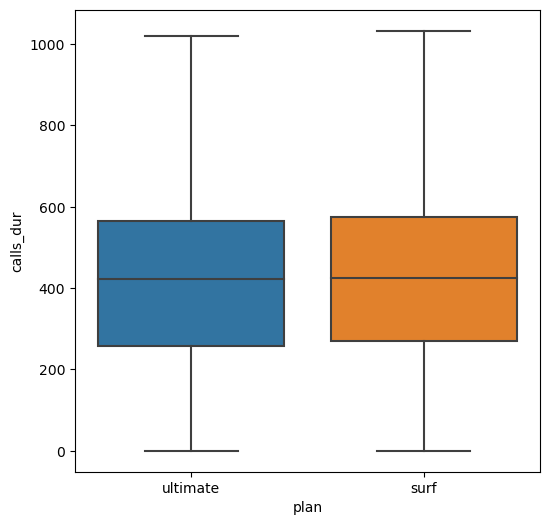

In [59]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(6,6))
ax=sns.boxplot(x="plan", y="calls_dur", data=total,showfliers = False);

So how the users behave in terms of calling? Is their behaviour different between the plans? - Based on the information given, it seems that the behavior of users in terms of calling is similar between the Surf and Ultimate plans. The means and medians of call durations are almost the same for both plans, suggesting that users on both plans spend a similar amount of time on calls on average. Additionally, the distributions of call durations are also said to be similar, which further supports the conclusion that user behavior is not significantly different between the plans.

### Messages

And now it's time to look at messaging habits.

In [60]:
# Compare average number of messages per each plan per each distinct month. 
messages_average_month = total.pivot_table(index='plan', columns='month', values='messages_n', aggfunc='mean')
messages_average_month

month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
plan,,,,,,,,,,,,,
surf,0.0,10.5,12.000000,15.26087,17.400000,24.012987,25.298969,27.033058,28.777778,30.762887,33.839662,32.385159,38.600629
ultimate,0.0,15.5,21.571429,20.25000,22.047619,32.103448,29.340426,32.830508,38.478873,37.895349,39.443396,38.606299,45.006623


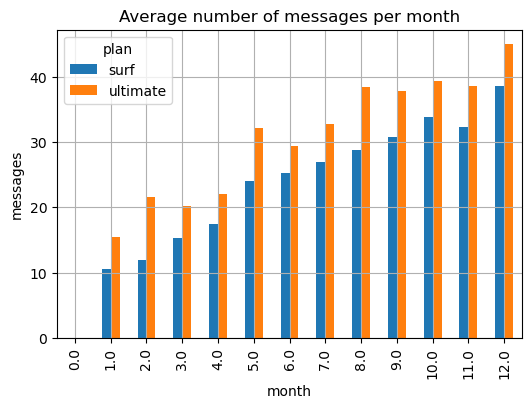

In [61]:
# Plot a bar plot to visualize it.
messages_average_month.T.plot(figsize=(6,4), kind='bar', grid= True)
plt.title('Average number of messages per month')
plt.ylabel('messages');

The information indicates that Ultimate users are sending more messages on average than Surf users, it is possible that this is due to the Ultimate plan including more messages as part of its service package. 

And now let's see if the general distribution of sent messages reflects it too.

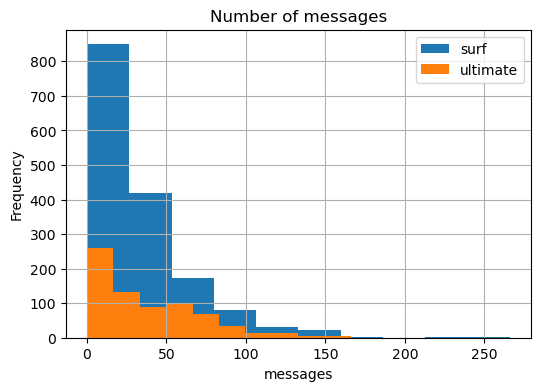

In [62]:
# Compare the number of messages users of each plan tend to send each month
total.groupby('plan')['messages_n'].plot(kind='hist', grid=True, figsize=(6,4))
plt.legend(('surf', 'ultimate'), loc='upper right')
plt.title('Number of messages')
plt.xlabel('messages')
plt.show();


The general disrtibutions of both plans for number of messages look similar but it could be explained not big difference between their means and medians.

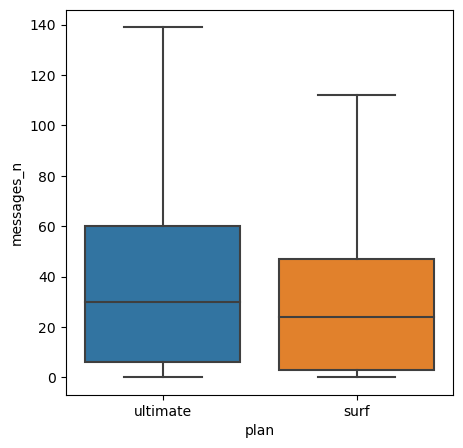

In [81]:
# Plot a boxplot to visualize the distribution of the number of messages

plt.figure(figsize=(5,5))
ax=sns.boxplot(x="plan", y="messages_n", data=total,showfliers = False);

The boxplot shows a higher median and larger interquartile range (IQR) for the number of messages sent by Ultimate users compared to Surf users, so it would support the conclusion that Ultimate users are messaging more than Surf users. And it's reasonable because of the difference in included messages in their respective plans.



### Internet

Let's look at the Internet consumption.

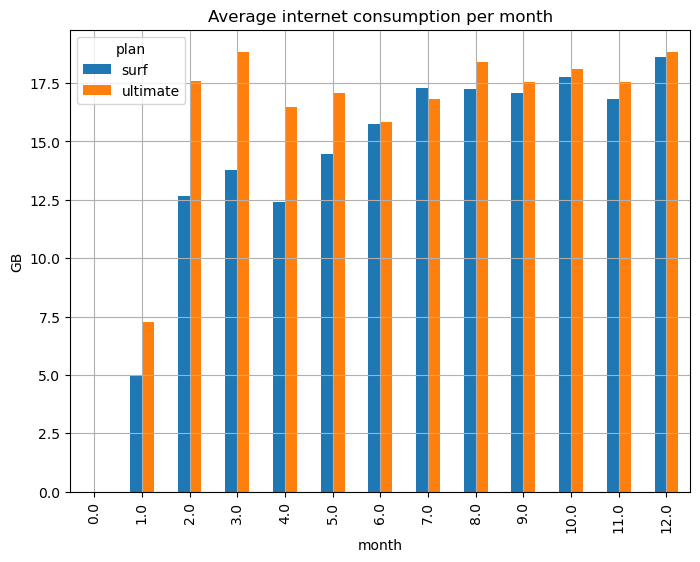

In [64]:
# Compare average internet consumption per each plan per each distinct month. Plot a bar plot to visualize it.
traffic_average_month = total.pivot_table(index='plan', columns='month', values='gb_used', aggfunc='mean')
traffic_average_month
traffic_average_month.T.plot(figsize=(8,6), kind='bar', grid= True)
plt.title('Average internet consumption per month')
plt.ylabel('GB');

Here we see that first five month of the year Surf users were using internet less than Ultimate users, but from June the data on average internet consumption equalized. 

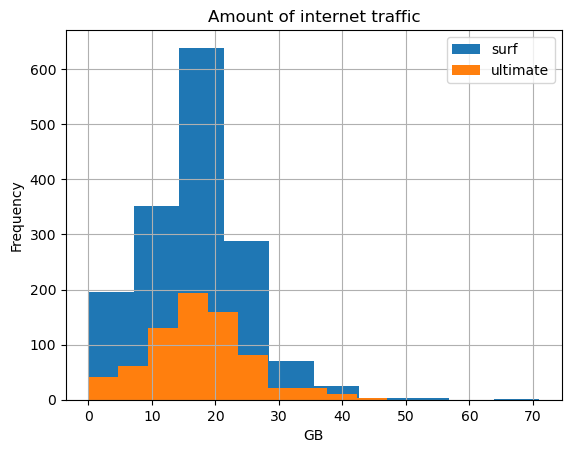

In [65]:
# Compare the amount of internet traffic consumed by users per plan
total.groupby('plan')['gb_used'].plot(kind='hist', grid=True)
plt.legend(('surf', 'ultimate'), loc='upper right')
plt.title('Amount of internet traffic')
plt.xlabel('GB')
plt.show();


The overall distributions of internet consumption for Surf and Ultimate users appear to be almost normal and very similar, and it would suggests that the two groups have similar patterns of internet usage. We also remember that their means and medians are quite similar - all around 17. 

So how the users behave in terms of data usage? Is their behaviour different between the plans? - Based on the information given, it seems that the behavior of users in terms of Internet consumption is similar between the Surf and Ultimate plans. The means and medians of data used are almost the same for both plans, suggesting that users on both plans consume a similar amount of data. Additionally, the distributions of data usage are also said to be similar, which further supports the conclusion that user behavior is not significantly different between the plans.



## Revenue

Likewise we have studied the user behaviour, let's describe the revenue between the plans.

In [66]:
# Compare average total revenue per each plan per each distinct month. 
traffic_average_month = total.pivot_table(index='plan', columns='month', values='total_revenue', aggfunc='mean')
traffic_average_month



month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
plan,,,,,,,,,,,,,
surf,20.0,20.0,37.73,48.115217,42.110600,50.095714,51.338144,66.227769,67.141049,61.106546,68.163840,61.149152,73.670252
ultimate,70.0,70.0,70.00,75.833333,73.666667,70.965517,71.787234,72.135593,73.450704,72.360465,72.641509,71.984252,73.847682


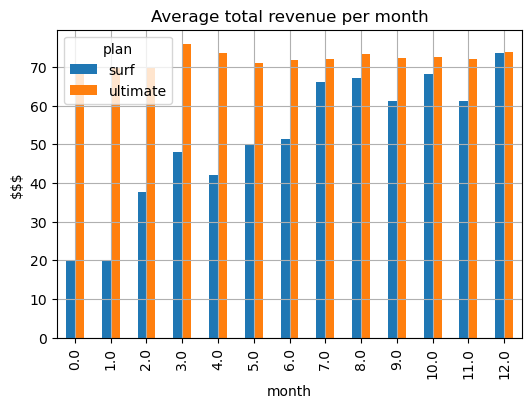

In [67]:
# Plot a bar plot to visualize it.
traffic_average_month.T.plot(figsize=(6,4), kind='bar', grid= True)
plt.title('Average total revenue per month')
plt.ylabel('$$$');

 This histogram indicates that Ultimate users are bringing more money on average every month than Surf users.

In [68]:
# Compare average additinal revenue per each plan per each distinct month. 
traffic_average_month = total.pivot_table(index='plan', columns='month', values='add_revenue', aggfunc='mean')
traffic_average_month


month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
plan,,,,,,,,,,,,,
surf,0.0,0.0,17.73,28.115217,22.110600,30.095714,31.338144,46.227769,47.141049,41.106546,48.163840,41.149152,53.670252
ultimate,0.0,0.0,0.00,5.833333,3.666667,0.965517,1.787234,2.135593,3.450704,2.360465,2.641509,1.984252,3.847682


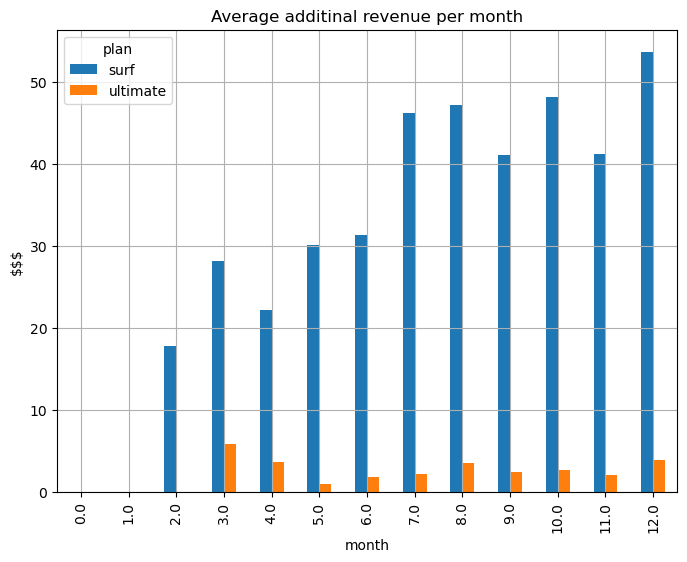

In [69]:
# Plot a bar plot to visualize it.
traffic_average_month.T.plot(figsize=(8,6), kind='bar', grid= True)
plt.title('Average additinal revenue per month')
plt.ylabel('$$$');

But if we look at the additional revenue (the extra payment when user exceeds plan's limit) we will see different picture - the average additional revenue from Surf users is a lot bigger.

Let's look at the general distributions for total and additional revenue from both our plans.

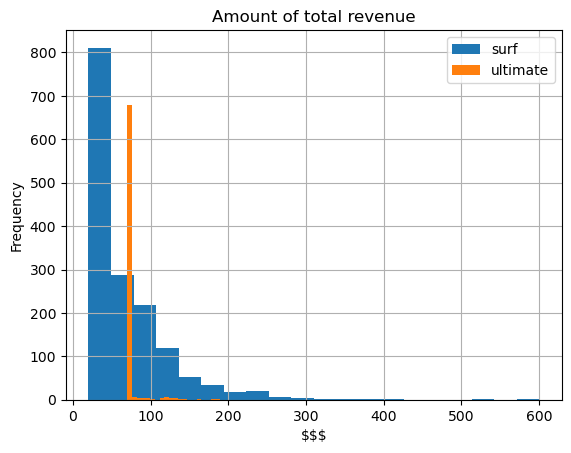

In [70]:
# Compare the amount of revenue by users per plan
total.groupby('plan')['total_revenue'].plot(kind='hist', grid=True, bins=20)
plt.legend(('surf', 'ultimate'), loc='upper right')
plt.title('Amount of total revenue')
plt.xlabel('$$$')
plt.show();

In [71]:
total.groupby('plan')['total_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1579.0,63.445966,57.360886,20.0,20.0,43.75,90.0,600.37
ultimate,724.0,72.687845,12.639564,70.0,70.0,70.00,70.0,189.00


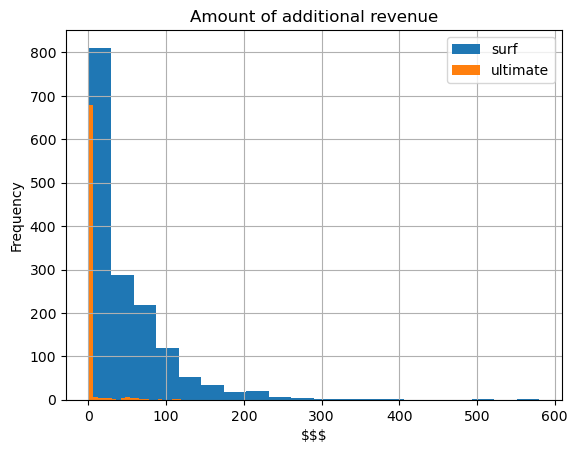

In [72]:
# Compare the amount of additional revenue by users per plan
total.groupby('plan')['add_revenue'].plot(kind='hist', grid=True, bins=20)
plt.legend(('surf', 'ultimate'), loc='upper right')
plt.title('Amount of additional revenue')
plt.xlabel('$$$')
plt.show();


In [73]:
total.groupby('plan')['add_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1579.0,43.445966,57.360886,0.0,0.0,23.75,70.0,580.37
ultimate,724.0,2.687845,12.639564,0.0,0.0,0.00,0.0,119.00


Both histograms illustrate that Surf users are paying more than Ultimate users. The total revenue histogram shows a high peak for Ultimate at their subscription monthly cost of 70 dollars, while Surf users' distribution is highly skewed to the right, indicating that most users pay more than the subscription cost of 20 dollars, and their median values are significantly larger.

The additional revenue histogram shows that Ultimate users tend to stay within their plan's limits, with a high peak at 0. In contrast, Surf users have additional payments ranging from 0 to almost 600, with a mean value of 43.4 and a median of 23.75.

Based on the accumulated data, it appears that Surf users are paying more to the company than their expected monthly subscription cost. This is likely because their plan limits for calls and data usage are significantly lower than Ultimate's plan limits. Even though user behavior is similar for both plans, this difference in plan limits leads to Surf users exceeding their limits more frequently, resulting in more additional payments.

However, on average, we still see that Ultimate plan's total revenue is higher in any given month because the cost of the monthly subscription is higher. Therefore, while Surf users may be paying more on average than their expected cost, Ultimate users are still generating more revenue for the company due to their higher subscription cost.

So now we have two datasets on two celular plans and some of their parameters are similar and some of them are not. We have statistical tool in hand to test if these two datasets are in fact similar, and if these two celular plans bring equal or comparable revenue. Let's proceed with that!

## Test statistical hypotheses

Let's compare two plans datasets and test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

In [74]:
# Calculate the variance of the monthly total revenue
surf_user_total_revenue_variance = np.var(surf_users.total_revenue)
print('Surf users total revenue variance:', surf_user_total_revenue_variance)
ultimate_users_total_revenue_variance = np.var(ultimate_users.total_revenue)
print('Ultimate users total revenue variance:', ultimate_users_total_revenue_variance)


Surf users total revenue variance: 3288.1875147575215
Ultimate users total revenue variance: 159.53791856170352


Null hypotheses is "Two plans are equal in terms of revenue." 

And alternative hypotheses is "Two plans are not equal in terms of revenue." 


We set a critical statistical significance level at 5%. For the tessting we choose ttest for independant samples.


In [75]:
# Test the hypotheses
from scipy import stats as st


alpha = 0.05# your code: set a critical statistical significance level

results = st.ttest_ind(ultimate_users['total_revenue'], surf_users['total_revenue'], equal_var = False)

print(results)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
surf_users_mean_total_revenue = surf_users['total_revenue'].mean()
print('Surf users average total revenue', surf_users_mean_total_revenue)
ultimate_users_mean_total_revenue = ultimate_users['total_revenue'].mean()
print('Ultimate users average total revenue', ultimate_users_mean_total_revenue)

Ttest_indResult(statistic=6.088054584880939, pvalue=1.3814968413089234e-09)
We reject the null hypothesis
Surf users average total revenue 63.44596580113988
Ultimate users average total revenue 72.6878453038674


We reject the null hypothesis because calculated pvalue is smaller than a critical statistical significance level and state that these two plans are not the same in terms of total revenue.

Let's test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

In [76]:
ny_nj_users = total[total['city'].str.contains('NY-NJ')]
ny_nj_users.sample(5)


others = total[~total['city'].str.contains('NY-NJ')]
others.sample(5)


,user_id,month,calls_n,calls_dur,messages_n,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_revenue,add_revenue
197,1049,5.0,42.0,300.0,0.0,8.0,Loise,Avery,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-21,surf,0,20.00,0.00
173,1043,11.0,25.0,185.0,107.0,34.0,Carlos,Hinton,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-20,ultimate,0,98.00,28.00
558,1120,9.0,60.0,427.0,53.0,29.0,Abraham,Mcconnell,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-03,surf,0,160.09,140.09
644,1140,8.0,89.0,577.0,13.0,21.0,Randolph,Graves,53,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-26,surf,0,82.31,62.31
496,1106,10.0,68.0,483.0,0.0,20.0,Eddy,Garrison,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-10,surf,2018-11-14 00:00:00,70.00,50.00


,user_id,month,calls_n,calls_dur,messages_n,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_revenue,add_revenue
1634,1359,10.0,63.0,433.0,0.0,28.0,Sherley,Norris,33,"Colorado Springs, CO MSA",2018-02-08,surf,0,150.00,130.00
879,1187,8.0,68.0,521.0,11.0,22.0,Tanner,Goodman,49,"Austin-Round Rock-Georgetown, TX MSA",2018-02-20,surf,0,90.63,70.63
339,1072,12.0,71.0,420.0,18.0,35.0,Seymour,Spence,66,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-12,surf,0,220.00,200.00
1056,1228,12.0,27.0,164.0,0.0,9.0,Jude,Hale,26,"Detroit-Warren-Dearborn, MI MSA",2018-04-15,surf,0,20.00,0.00
991,1213,12.0,82.0,566.0,85.0,19.0,Carl,Newman,47,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-11-25,ultimate,0,70.00,0.00


In [77]:
ny_nj_users_total_revenue_variance = np.var(ny_nj_users.total_revenue)
print('NY-NJ users total revenue variance:', ny_nj_users_total_revenue_variance)
others_total_revenue_variance = np.var(others.total_revenue)
print('Not NY-NJ total revenue variance:', others_total_revenue_variance)

NY-NJ users total revenue variance: 2040.023542516305
Not NY-NJ total revenue variance: 2375.5527401905515


Null hypotheses is "Average revenue from users in the NY-NJ area is equal to average revenue from users from the other regions." 

And alternative hypotheses is "Average revenue from users in the NY-NJ area is not equal to average revenue from users from the other regions." 

We set a critical statistical significance level at 5%. 

For the testing we choose ttest for independant samples.

In [78]:
# Test the hypotheses
alpha = 0.05 

results = st.ttest_ind(ny_nj_users['total_revenue'], others['total_revenue'], equal_var = False)

print(results)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
ny_nj_users_mean_total_revenue = ny_nj_users['total_revenue'].mean()
print('NY-NJ users average total revenue', ny_nj_users_mean_total_revenue)
others_mean_total_revenue = others['total_revenue'].mean()
print('Not NY-NJ users average total revenue', others_mean_total_revenue)


Ttest_indResult(statistic=-1.6739333707251327, pvalue=0.0946991823182318)
We can't reject the null hypothesis
NY-NJ users average total revenue 62.74431216931219
Not NY-NJ users average total revenue 67.05965194805188


Based on our calculated p-value being greater than the critical statistical significance level that we have set, we cannot reject the null hypothesis. This means that there is an 9% probability that the similarity between the two datasets is not coincidental.

## General conclusion

During data analysis process, we encountered several challenges that had to be addressed to ensure the analysis could be carried out effectively. These challenges included:

1. Data being split into several dataframes;
2. Incorrect datatypes in some columns in every dataframe;
3. Necessity to calculate important information and merge all the calculated data together.


Based on the analysis of user behavior, it appears that there is not a significant difference between the Surf and Ultimate plans in terms of calling and data usage. 
Regarding messaging behavior, the information indicates that Ultimate users send more messages than Surf users. This is likely due to the difference in included messages in their respective plans, as the Ultimate plan offers a higher limit.

While Surf users may end up paying more than their expected monthly subscription cost due to exceeding their plan limits, Ultimate users generate more revenue for the company overall due to the higher cost of their monthly subscription. 

We conducted a hypothesis test to determine if the Surf and Ultimate celular plans are equal in terms of revenue. The null hypothesis was that the plans are equal, and the alternative hypothesis was that they are not equal. We set a critical statistical significance level of 5% and used a t-test for independent samples to conduct the analysis. Based on the results, we rejected the null hypothesis and state that the two plans are not equal in terms of total revenue.

We also conducted a hypothesis test to determine if the average revenue from users in the NY-NJ area is equal to the average revenue from users from other regions. The null hypothesis was that the averages are equal, and the alternative hypothesis was that they are not equal. We set a critical statistical significance level of 5% and used a t-test for independent samples to conduct the analysis. Based on the results, we cannot reject the null hypothesis and state that there is a 9% probability that the similarity between the two datasets is not coincidental.